# **Perceptron simple et multicouche avec Keras**

[Tensorflow](https://www.tensorflow.org/) = bibliothèque open-source développée par Google Brain qui implémente des méthodes d'apprentissage automatique basées sur le principe des réseaux de neurones profonds (deep learning). API Python est disponible donc exploitable directement mais moins "directe" que `Keras`.

[Keras](https://keras.io/) =  librairie  Python qui encapsule l'accès aux fonctions proposées par plusieurs librairies  de  machine  learning,  en  particulier  Tensorflow. Keras n'implémente donc pas les  méthodes mais sert d'interface

## **1. Classification binaire sur données simulées**

### **1.1 Génération des données**

1. Générer :
>- un vecteur aléatoire $X_1$ de 2000 observation à valeurs dans $[-0.5, 0.5]$
>- un vecteur aléatoire $X_2$ de 2000 observation à valeurs dans $[0, 1]$

In [1]:
from numpy.random import random
x1 = random(2000)-0.5
x2 = random(2000)
x1,x2

(array([ 0.39829916, -0.23219272,  0.19320615, ..., -0.1917522 ,
        -0.44483633, -0.26274838]),
 array([0.19191534, 0.59888949, 0.07550748, ..., 0.98699721, 0.71532097,
        0.61866816]))

2. Construire la variable label $Y$ de la manière suivante : $Y = 1$ si $0.1*X_2 > X_1²$ et 0 sinon

In [2]:
y = 1 * (x1**2-0.1*x2 < 0)

In [3]:
import numpy as np
np.where(x1**2-0.1*x2 < 0, 1, 0)

array([0, 1, 0, ..., 1, 0, 0])

3. Regrouper les 2 variables prédictives $X_1$ $X_2$ et la variable expliquée $Y$ dans un dataframe puis représenter graphiquement les données

In [4]:
import pandas as pd
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df.head()

,x1,x2,y
0,0.398299,0.191915,0
1,-0.232193,0.598889,1
2,0.193206,0.075507,0
3,-0.466091,0.460464,0
4,0.022378,0.386106,1


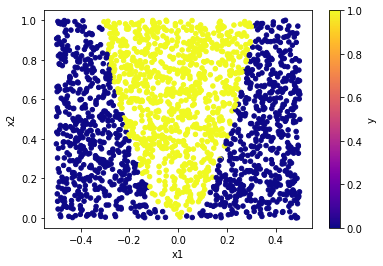

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.plot.scatter(x='x1',  y='x2', c='y', colormap='plasma', ax=ax);

4. Découper les données en échantillons d'entraînement et test (avec 500 observations dans le testset)

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 2), (500, 2), (1500,), (500,))

5. Calculer la répartition des classes (c'est-à-dire la proportion de labels valant "1") dans les échantillons test et train.  
Est-elle équilibrée ?  
Si ce n'est pas le cas, quel paramètre utiliser lors du `train_test_split` pour y remédier ?

In [7]:
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.4275, 0.4266666666666667, 0.43)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, stratify=y)
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.4275, 0.42733333333333334, 0.428)

### **1.2 Perceptron simple**

1. Importer les classes `Sequential` et `Dense` depuis la librairie adaptée. C'est quoi ce truc ?

In [9]:
from keras.models import Sequential
from keras.layers import Dense

2. Instancier le modèle `perceptron`

In [10]:
perceptron = Sequential()
type(perceptron)

2022-01-25 16:35:17.175874: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-25 16:35:17.197447: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 1999965000 Hz
2022-01-25 16:35:17.197831: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564dadf3f030 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-25 16:35:17.197854: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


tensorflow.python.keras.engine.sequential.Sequential

3. Ajouter une couche pour spécifier un perceptron simple en spécifiant les bons paramètres (on prendra une fonction d'activation sigmoïde).

In [11]:
perceptron.add(Dense(units=1, input_dim=2, activation='sigmoid'))

4. Récupérer la configuration de votre modèle. À quoi correspond le paramètre `use_bias` ?

In [12]:
perceptron.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [13]:
perceptron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


`use_bias` permet de d'ajouter un biais sur chacun des neurones : ça revient à avoir un input supplémentaire constant égal à 1.

5. Ci-dessous une répresentation visuelle de notre réseau. Quelles sont les valeurs (théoriques) en entrée et en sortie du neurone de la couche de sortie ? Que représente la valeur en sortie ?  
<img src="images/perceptron_simple.png">

En entrée de la couche de sortie :
$$a_0 + a_1.x_1 + a_2.x_2$$

En sortie de la couche de sortie:
$$\frac{1}{1+\exp^{-(a_0 + a_1.x_1 + a_2.x_2)}} = P(y=1|x_1,x_2)$$

6. Spécifier les paramètres d'apprentissage avec la méthode `compile`. On utilisera l'entropie croisée binaire comme fonction de perte, Adam comme algorithme d'optimisation et l'accuracy comme métrique.

In [14]:
perceptron.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

7. Entraîner le réseau afin d'en estimer les paramètres. Fixer notamment les hyperparamètres `epochs` et `batch_size`. Que sont-ils ?

In [15]:
perceptron.fit(X_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
100/100 [==============================] - 0s 498us/step - loss: 0.7181 - accuracy: 0.4760
Epoch 2/100
100/100 [==============================] - 0s 518us/step - loss: 0.7013 - accuracy: 0.5120
Epoch 3/100
100/100 [==============================] - 0s 478us/step - loss: 0.6882 - accuracy: 0.5513
Epoch 4/100
100/100 [==============================] - 0s 500us/step - loss: 0.6782 - accuracy: 0.5827
Epoch 5/100
100/100 [==============================] - 0s 489us/step - loss: 0.6708 - accuracy: 0.6133
Epoch 6/100
100/100 [==============================] - 0s 563us/step - loss: 0.6653 - accuracy: 0.6253
Epoch 7/100
100/100 [==============================] - 0s 561us/step - loss: 0.6613 - accuracy: 0.6320
Epoch 8/100
100/100 [==============================] - 0s 538us/step - loss: 0.6584 - accuracy: 0.6400
Epoch 9/100
100/100 [==============================] - 0s 479us/step - loss: 0.6562 - accuracy: 0.6520
Epoch 10/100
100/100 [==============================] - 0s 477us/step - l

8. Récupérer les poids estimés et les replacer dans le réseau dessiné au dessus.

In [16]:
perceptron.get_weights()

[array([[-0.13810575],
        [ 2.131321  ]], dtype=float32),
 array([-1.3720529], dtype=float32)]

On a un array avec les poids $a_1$, $a_2$ des inputs $x_1$ et $x_2$ et un autre contenant le biais $a_0$.

9. Calculer les prédictions sur le testset avec `predict`. Que sont ces valeurs ?

In [17]:
y_pred = perceptron.predict(X_test)
y_pred[:8]

array([[0.3195322 ],
       [0.4070343 ],
       [0.47807026],
       [0.602221  ],
       [0.21534365],
       [0.31945762],
       [0.5657594 ],
       [0.42792356]], dtype=float32)

10. Récupérer à partir de ces valeurs prédites, la classe prédite

In [18]:
classes_pred = 1 * (y_pred > 0.5)
classes_pred[:8]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

11. Présenter au moins 2 mesures d'évaluation du modèle (adapté au problème traité bien sûr !) en utilisant des fonctions de `sklearn.metrics`

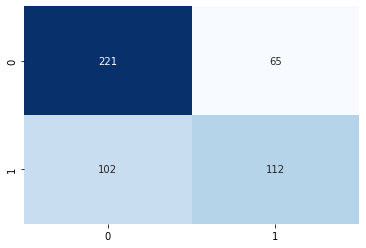

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, classes_pred), annot=True, cbar=False, cmap='Blues', fmt='d');

In [20]:
accuracy_score(y_test, classes_pred)

0.666

In [21]:
print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.73       286
           1       0.63      0.52      0.57       214

    accuracy                           0.67       500
   macro avg       0.66      0.65      0.65       500
weighted avg       0.66      0.67      0.66       500



12. La même avec la méthode `evaluate`. Qu'est-ce que vous obtenez ?

In [22]:
perceptron.evaluate(X_test, y_test)

16/16 [==============================] - 0s 603us/step - loss: 0.6157 - accuracy: 0.6660


[0.6156750321388245, 0.6660000085830688]

### **1.3 Perceptron multicouche**

1. Reprendre toutes les étapes de la partie précédente pour construire et entraîner (partie 1.2, questions 1 à 7) un réseau à 3 couches de la forme suivante :

<img src="images/perceptron_multi.png">

In [23]:
# construction
perceptron_multi = Sequential()
perceptron_multi.add(Dense(units=3, input_dim=2, activation='sigmoid'))
perceptron_multi.add(Dense(units=1, activation='sigmoid'))
perceptron_multi.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [24]:
perceptron_multi.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_1_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 3,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bia

In [25]:
# compilation : paramètres d'apprentissage
perceptron_multi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# entrainement
perceptron_multi.fit(X_train, y_train, epochs=200, batch_size=15)

Epoch 1/200
100/100 [==============================] - 0s 478us/step - loss: 0.7480 - accuracy: 0.4273
Epoch 2/200
100/100 [==============================] - 0s 493us/step - loss: 0.7135 - accuracy: 0.4273
Epoch 3/200
100/100 [==============================] - 0s 475us/step - loss: 0.6943 - accuracy: 0.4760
Epoch 4/200
100/100 [==============================] - 0s 482us/step - loss: 0.6840 - accuracy: 0.6267
Epoch 5/200
100/100 [==============================] - 0s 474us/step - loss: 0.6789 - accuracy: 0.5673
Epoch 6/200
100/100 [==============================] - 0s 471us/step - loss: 0.6764 - accuracy: 0.5727
Epoch 7/200
100/100 [==============================] - 0s 492us/step - loss: 0.6744 - accuracy: 0.5727
Epoch 8/200
100/100 [==============================] - 0s 507us/step - loss: 0.6730 - accuracy: 0.5727
Epoch 9/200
100/100 [==============================] - 0s 497us/step - loss: 0.6718 - accuracy: 0.5727
Epoch 10/200
100/100 [==============================] - 0s 487us/step - l

2. Récupérer les poids et les replacer "à la main" dans le schéma du réseau de neurones

In [26]:
perceptron_multi.get_weights()

[array([[ 11.764167 , -10.757565 ,   9.195044 ],
        [ -2.4047585,  -2.4534278,   2.7752306]], dtype=float32),
 array([-1.3620868, -1.4134196,  0.9791853], dtype=float32),
 array([[-8.771245 ],
        [-6.3549714],
        [ 3.9721193]], dtype=float32),
 array([0.48090595], dtype=float32)]

3. Et pour finir, on fait quoi ? Y a plus qu'à le faire alors.

In [27]:
perceptron_multi.evaluate(X_test, y_test)

16/16 [==============================] - 0s 486us/step - loss: 0.1427 - accuracy: 0.9920


[0.14269527792930603, 0.9919999837875366]

In [28]:
classes_pred = 1*(perceptron_multi.predict(X_test)>0.5)

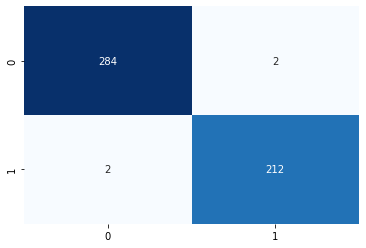

In [29]:
sns.heatmap(confusion_matrix(y_test, classes_pred),
            annot=True, cbar=False, cmap='Blues', fmt='d');

In [30]:
print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.99      0.99       214

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



## **2. Application à un problème multi-classes**

On va utiliser des données sur le vin disponibles sur le site UCI. Le but est de classifier 3 vignerons d'une même région à partir des caractéristiques des vins qu'ils produisent.

### **2.1 Les données**

1. Récupérer les données WINE [ici](https://archive.ics.uci.edu/ml/datasets/wine). Si vous voulez automatiser la récupération, c'est toujours un bon exo donc allez-y mais c'est pas l'objet du tp donc perdez pas trop de temps là-dessus. Les mettre dans un dataframe tout beau tout propre.

In [32]:
import pandas as pd
wine = pd.read_csv('data/wine.csv')
wine.head()

,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
# petites modifs de forme
colnames = ["cultivars","alcohol","malic","ash","alcalinity",
            "magnesium","tot_phenols","flavonoids","nonf_phenols",
            "proanth","color","hue","od280","proline"]

wine = pd.read_csv("data/wine.csv", names=colnames, skiprows=1)
wine.head()

,cultivars,alcohol,malic,ash,alcalinity,magnesium,tot_phenols,flavonoids,nonf_phenols,proanth,color,hue,od280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2. Quelques étapes usuelles avant d'aller plus loin : y a quoi dans le dataset, quelle est la variable d'intérêt, quelques stats descriptives, visualisations, etc...  

### **2.2 Preprocessing**

1. Keras  ne  sait  pas  manipuler  directement  une  variable multi-classe. Il faut la transformer en une série d’indicatrices. À vous de jouer (il y a une méthode `to_categorical` quelque part)

2. Découpage en échantillons train et test (avec 40 observations dans le test)

3. Les réseaux de neurones étant très dépendant des échelles des différentes variables, il faut standardiser les données avec un StandardScaler.  
Vérifier les moyennes et écart-types des variables après transformation. Qu'est-ce que vous devez avoir ?

### **2.3 Modélisation et évaluation**

1. Construire et entraîner un perceptron simple adapté au problème

2. Évaluer le modèle

3. Essayer d'améliorer votre modèle en ajoutant une couche cachée. Quel problème se pose lorsqu'on ajoute trop de couches ?